<a href="https://www.kaggle.com/code/hamzabouajila/facebook-posts-sentiment-analysis?scriptVersionId=112082989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkiye-student-evaluation-analysis/turkiye-student-evaluation_generic.csv
/kaggle/input/churntp2/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/turkiye-student-evaluation-analysis/turkiye-student-evaluation_generic.csv")

# Attribute Information :

- instr: Instructor's identifier; values taken from {1,2,3}
- class: Course code (descriptor); values taken from {1-13}
- repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
- attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
- difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
- Q1: The semester course content, teaching method and evaluation system were provided at the start.
- Q2: The course aims and objectives were clearly stated at the beginning of the period.
- Q3: The course was worth the amount of credit assigned to it.
- Q4: The course was taught according to the syllabus announced on the first day of class.
- Q5: The class discussions, homework assignments, applications and studies were satisfactory.
- Q6: The textbook and other courses resources were sufficient and up to date.
- Q7: The course allowed field work, applications, laboratory, discussion and other studies.
- Q8: The quizzes, assignments, projects and exams contributed to helping the learning.
- Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.
- Q10: My initial expectations about the course were met at the end of the period or year.
- Q11: The course was relevant and beneficial to my professional development.
- Q12: The course helped me look at life and the world with a new perspective.
- Q13: The Instructor's knowledge was relevant and up to date.
- Q14: The Instructor came prepared for classes.
- Q15: The Instructor taught in accordance with the announced lesson plan.
- Q16: The Instructor was committed to the course and was understandable.
- Q17: The Instructor arrived on time for classes.
- Q18: The Instructor has a smooth and easy to follow delivery/speech.
- Q19: The Instructor made effective use of class hours.
- Q20: The Instructor explained the course and was eager to be helpful to students.
- Q21: The Instructor demonstrated a positive approach to students.
- Q22: The Instructor was open and respectful of the views of students about the course.
- Q23: The Instructor encouraged participation in the course.
- Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
- Q25: The Instructor responded to questions about the course inside and outside of the course.
- Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
- Q27: The Instructor provided solutions to exams and discussed them with students.
- Q28: The Instructor treated all students in a right and objective manner.
- Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}



In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Exploratoration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [5]:
df.duplicated().sum()

1843

In [6]:
df = df.drop_duplicates()
df.shape

(3977, 33)

<AxesSubplot:>

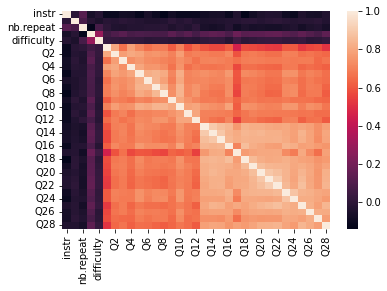

In [7]:
sns.heatmap(df.corr())

# *Exploitation*

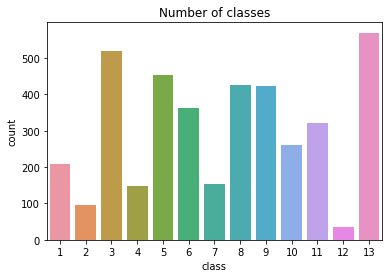

In [8]:
sns.countplot(x = df['class']).set(title ='Number of classes');

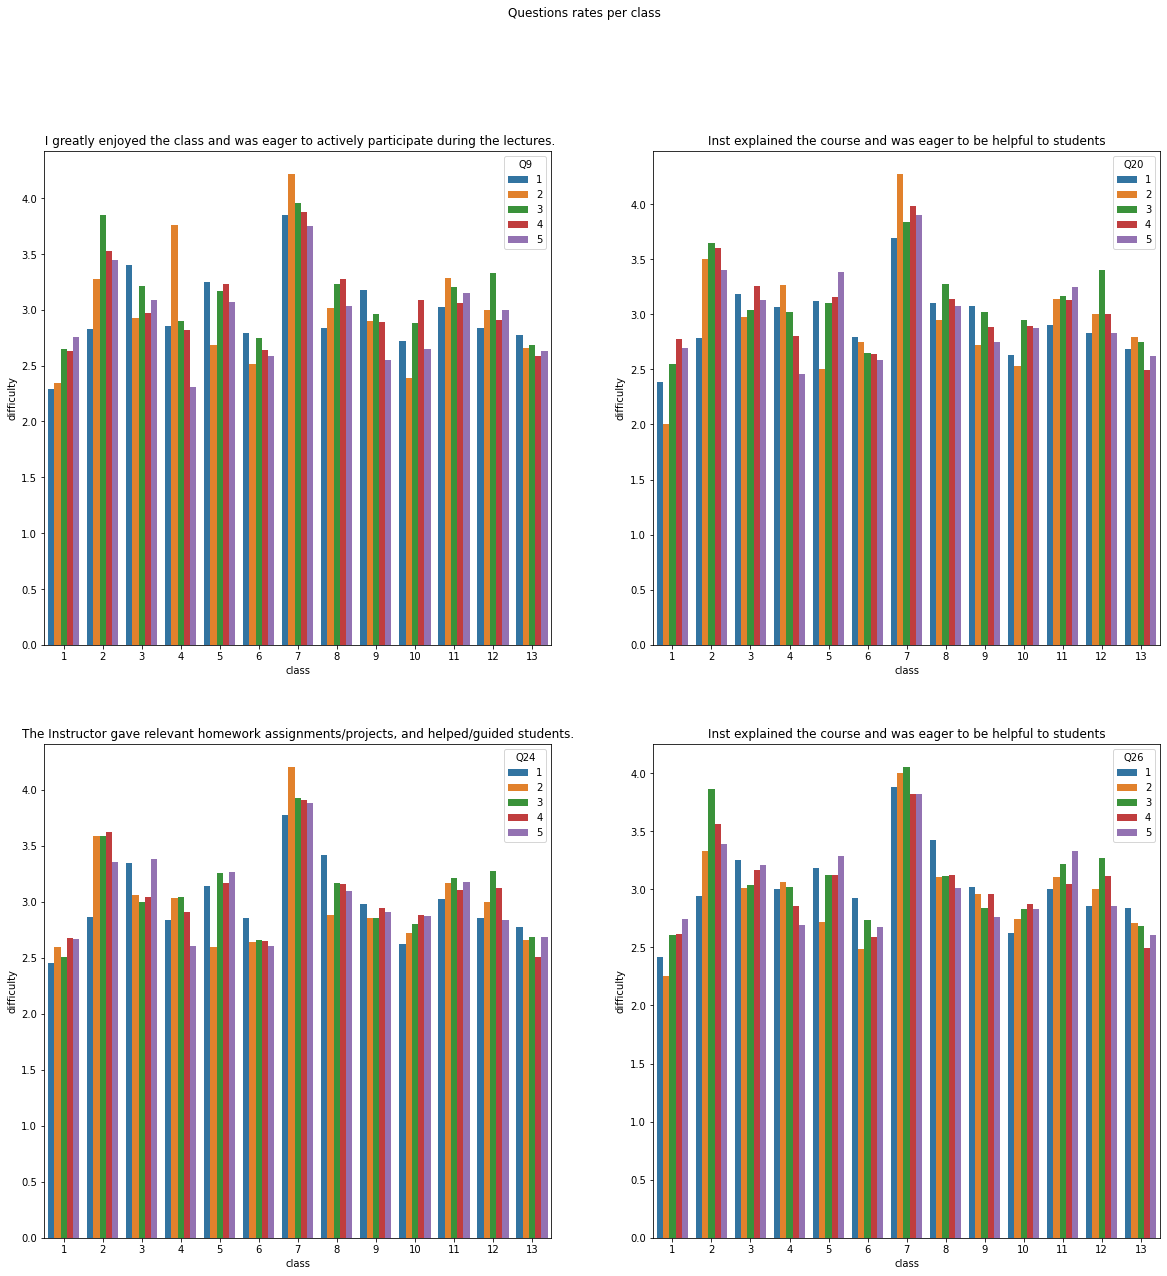

In [9]:
fig , axes = plt.subplots(2,2 ,figsize =(20,20));
fig.suptitle('Questions rates per class')
sns.barplot(data = df , x= 'class' , y = 'difficulty' , ci = None ,hue = 'Q9', ax = axes[0][0]).set(title = ' I greatly enjoyed the class and was eager to actively participate during the lectures.');
sns.barplot(data = df , x= 'class' , y = 'difficulty' , ci = None,hue = 'Q20' , ax = axes[0][1]).set(title = 'Inst explained the course and was eager to be helpful to students');
sns.barplot(data = df , x= 'class' , y = 'difficulty' , ci = None ,hue = 'Q24', ax = axes[1][0]).set(title = 'The Instructor gave relevant homework assignments/projects, and helped/guided students.');
sns.barplot(data = df , x= 'class' , y = 'difficulty' , ci = None ,hue = 'Q26', ax = axes[1][1]).set(title = 'Inst explained the course and was eager to be helpful to students');

In [10]:
# help(sns.barplot)

In [11]:
df.groupby('nb.repeat').mean().iloc[:,:4]

,instr,class,attendance,difficulty
nb.repeat,,,,
1,2.457161,7.230769,1.938086,2.928080
2,2.649087,7.594320,1.486815,3.066937
3,2.706294,8.325175,1.412587,3.272727


<AxesSubplot:>

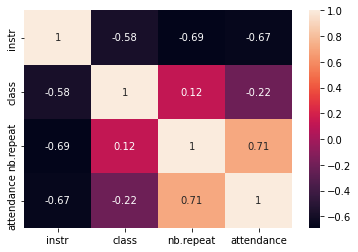

In [12]:
sns.heatmap(data = df.groupby('difficulty').mean().iloc[:,:4].corr() , annot = True)

- **There is a strong positive correlation between attendance and nb_repeat**

- **There is a strong negative correlation between attendance and instructor**


# Reduce data demension using t-SNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
# help(TSNE)

In [15]:
tsne = TSNE(n_components=3 , verbose=1 , random_state=123  )

In [16]:
z = tsne.fit_transform(df) 

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3977 samples in 0.001s...
[t-SNE] Computed neighbors for 3977 samples in 0.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3977
[t-SNE] Computed conditional probabilities for sample 2000 / 3977
[t-SNE] Computed conditional probabilities for sample 3000 / 3977
[t-SNE] Computed conditional probabilities for sample 3977 / 3977
[t-SNE] Mean sigma: 1.481426
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.027557
[t-SNE] KL divergence after 1000 iterations: 1.038884


In [17]:
df1 = pd.DataFrame()
df1['1'] = z[:,0]
df1['2'] = z[:,1]
df1['3'] = z[:,2]

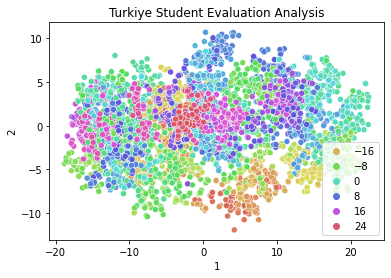

In [18]:
sns.scatterplot(x="1", y="2", hue=df1['3'].tolist(),
                palette=('hls'),
                data=df1).set(title="Turkiye Student Evaluation Analysis") ;

# We are going to make dimension reduction using uMAP 

In [19]:
import umap 

In [20]:
brain_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)

In [21]:
df_umap = pd.DataFrame(brain_umap.fit_transform(df), columns = ['UMAP1','UMAP2'])


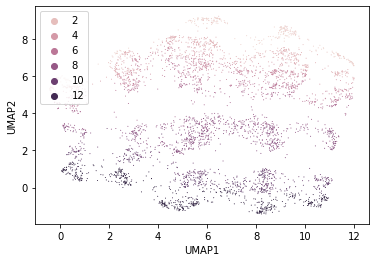

In [22]:
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap,hue = df['class'].to_list() , linewidth=0, s=1)

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## KMeans with t-SNE

In [24]:
ss = StandardScaler()

In [25]:
df1s = ss.fit_transform(df1)
df1s = pd.DataFrame(df1s)

In [26]:
df1s

,0,1,2
0,-1.562641,-0.808963,-0.683315
1,-1.579906,-0.863523,-0.718541
2,0.437436,-2.307325,-1.768165
3,-1.657763,0.488634,1.385471
4,-0.821781,-1.264517,-1.459703
...,...,...,...
3972,1.098507,0.482634,0.977151
3973,-0.326421,0.093655,2.084708
3974,1.642614,-0.600208,-0.300531
3975,1.947904,-0.915219,-0.866637


In [27]:
model1 = KMeans(init= 'random', n_clusters=10, n_init=10, random_state=1)

In [28]:
model1.fit(df1s)

KMeans(init='random', n_clusters=10, random_state=1)

In [29]:
df1s['cluster'] = model1.labels_


In [30]:
df1s

,0,1,2,cluster
0,-1.562641,-0.808963,-0.683315,4
1,-1.579906,-0.863523,-0.718541,4
2,0.437436,-2.307325,-1.768165,0
3,-1.657763,0.488634,1.385471,9
4,-0.821781,-1.264517,-1.459703,4
...,...,...,...,...
3972,1.098507,0.482634,0.977151,1
3973,-0.326421,0.093655,2.084708,8
3974,1.642614,-0.600208,-0.300531,6
3975,1.947904,-0.915219,-0.866637,6


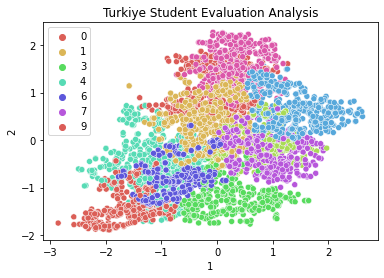

In [31]:
sns.scatterplot(x=1, y=2, hue=df1s['cluster'].tolist(),
                palette=('hls'),
                data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

### search for optimaum K :

#### elbow Method

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

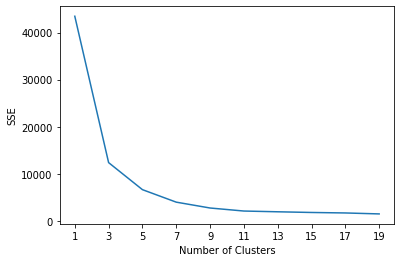

In [32]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in [1,3,5,7,9,11,13,15,17,19]:
    model1 = KMeans(n_clusters=k, **kmeans_kwargs)
    model1.fit(df1s)
    sse.append(model1.inertia_)

#visualize results
plt.plot([1,3,5,7,9,11,13,15,17,19], sse)
plt.xticks([1,3,5,7,9,11,13,15,17,19])
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Best k = 5

In [33]:
model1_opt = KMeans(init= 'random', n_clusters=5, n_init=10, random_state=1)
model1_opt.fit(df1s)
df1s['KMeans'] = model1_opt.labels_

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


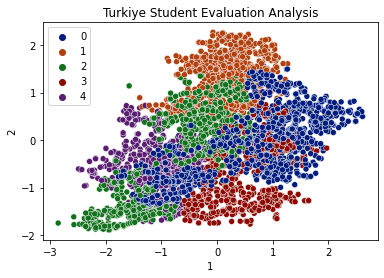

In [34]:
sns.scatterplot(x=1, y=2, hue=df1s['KMeans'].tolist(),
                palette=('dark'),
                data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

## Kmeans with uMAP

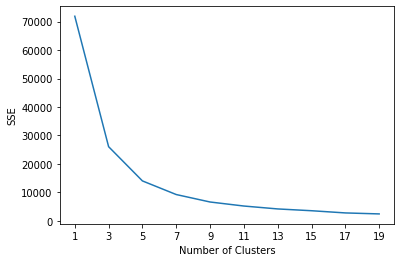

In [35]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in [1,3,5,7,9,11,13,15,17,19]:
    model2 = KMeans(n_clusters=k, **kmeans_kwargs)
    model2.fit(df_umap)
    sse.append(model2.inertia_)

#visualize results
plt.plot([1,3,5,7,9,11,13,15,17,19], sse)
plt.xticks([1,3,5,7,9,11,13,15,17,19])
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [36]:
model2_opt = KMeans(init= 'random', n_clusters=5, n_init=10, random_state=1)
model2_opt.fit(df_umap)
df_umap['Kmeans_umap'] = model2_opt.labels_

In [37]:
# sns.scatterplot(x=1, y=2, hue=df1s['Keans'].tolist(),
#                 palette=('dark'),
#                 data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

let's see the differences

In [38]:
# sns.scatterplot(x="1", y="2", hue=df['cluster1_opt'].tolist(),
#                 palette=('dark'),
#                 data=df1).set(title="Turkiye Student Evaluation Analysis") ;

## DBSCAN 

In [39]:
from sklearn.cluster import DBSCAN

#### The DBSCAN algorithm is deterministic, always generating the same clusters when given the same data in the same order. However, the results can differ when data is provided in a different order. 

In [40]:
# help(DBSCAN)

In [41]:
db = DBSCAN(eps = 0.5 ,min_samples = 5)

In [42]:
db.fit(df1s)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DBSCAN()

In [43]:
df1s["dbscan"] = db.labels_

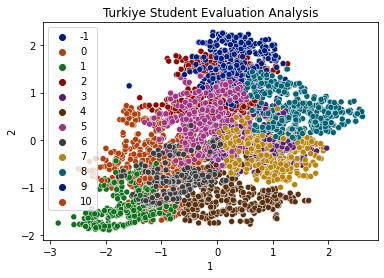

In [44]:
sns.scatterplot(x=1, y=2, hue=df1s['dbscan'].tolist(),
                palette=('dark'),
                data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

As we can see DBSCAN  is not goof for compressed clusters like that 

In [45]:
from sklearn.cluster import Birch

The Birch builds a tree called the Clustering Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Clustering Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Clustering Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

In [46]:
bc = Birch(n_clusters = 5)

In [47]:
bc.fit(df1s)
pred= bc.predict(df1s)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [48]:
df1s['Birch'] = pred

In [49]:
# sns.scatterplot(x=1, y=2, hue=df['Birch'].tolist(),
#                 palette=('dark'),alpha = 0.5 ,
#                 data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

In [50]:
from sklearn.neighbors import kneighbors_graph

In [51]:
connectivity = kneighbors_graph(df1s, n_neighbors = 5 ,mode = 'connectivity')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [52]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(
        n_clusters= 5 , linkage="ward", connectivity= connectivity
    )

In [53]:
output_ward = ward.fit_predict(df1s)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 21 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"


In [54]:
df1s['ward'] = output_ward

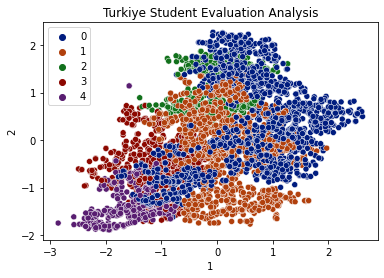

In [55]:
sns.scatterplot(x=1, y=2, hue=df1s['ward'].tolist(),
                palette=('dark'),
                data=df1s).set(title="Turkiye Student Evaluation Analysis") ;

In [56]:
import matplotlib.pyplot as plt 

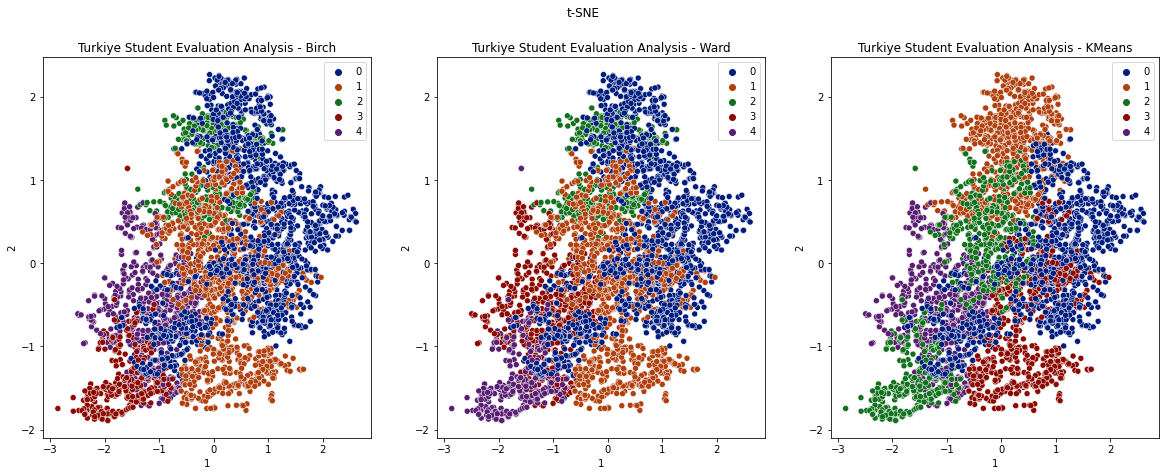

In [57]:
fig , axes = plt.subplots(1,3 , figsize =(20,7))
fig.suptitle('t-SNE')

sns.scatterplot(x=1, y=2, hue=df1s['Birch'].tolist(),
                palette=('dark'),
                data=df1s , ax =axes[0]).set(title="Turkiye Student Evaluation Analysis - Birch") ;

sns.scatterplot(x=1, y=2, hue=df1s['ward'].tolist(),
                palette=('dark'),
                data=df1s , ax = axes[1]).set(title="Turkiye Student Evaluation Analysis - Ward") ;

sns.scatterplot(x=1, y=2, hue=df1s['KMeans'].tolist(),
                palette=('dark'),
                data=df1s , ax =axes[2]).set(title="Turkiye Student Evaluation Analysis - KMeans") ;

In [58]:
df1s

,0,1,2,cluster,KMeans,dbscan,Birch,ward
0,-1.562641,-0.808963,-0.683315,4,4,0,4,3
1,-1.579906,-0.863523,-0.718541,4,4,0,4,3
2,0.437436,-2.307325,-1.768165,0,2,1,3,4
3,-1.657763,0.488634,1.385471,9,1,2,2,2
4,-0.821781,-1.264517,-1.459703,4,4,0,4,3
...,...,...,...,...,...,...,...,...
3972,1.098507,0.482634,0.977151,1,2,5,1,1
3973,-0.326421,0.093655,2.084708,8,1,9,0,0
3974,1.642614,-0.600208,-0.300531,6,0,6,0,0
3975,1.947904,-0.915219,-0.866637,6,0,6,0,0


# Evaluate clustring models

In [59]:
from sklearn.metrics import rand_score ,adjusted_rand_score ,accuracy_score  , precision_score

In [60]:
print("Ward vs Birch : {0:01f}".format(adjusted_rand_score(df1s['ward'], df1s['Birch'])))
print("Ward vs Kmeans : {0:03f}".format(adjusted_rand_score(df1s['ward'], df1s['KMeans'])))
print("Kmeans vs Birch : {0:03f}".format(adjusted_rand_score(df1s['KMeans'], df1s['Birch'])))

Ward vs Birch : 1.000000
Ward vs Kmeans : 0.628027
Kmeans vs Birch : 0.628027


In [61]:
print("Ward vs Birch : {0:01f}".format(accuracy_score(df1s['ward'], df1s['Birch'])))
print("Ward vs Kmeans : {0:03f}".format(accuracy_score(df1s['ward'], df1s['KMeans'])))
print("Kmeans vs Birch : {0:03f}".format(accuracy_score(df1s['KMeans'], df1s['Birch'])))

Ward vs Birch : 0.774705
Ward vs Kmeans : 0.286145
Kmeans vs Birch : 0.430727


In [62]:
print("Ward vs Birch : {0:01f}".format(precision_score(df1s['ward'], df1s['Birch'] , average = 'micro')))
print("Ward vs Kmeans : {0:03f}".format(precision_score(df1s['ward'], df1s['KMeans'], average = 'micro')))
print("Kmeans vs Birch : {0:03f}".format(precision_score(df1s['KMeans'], df1s['Birch'],average = 'weighted')))

Ward vs Birch : 0.774705
Ward vs Kmeans : 0.286145
Kmeans vs Birch : 0.354712


# Clustring With UMAP

In [63]:
df_umap

,UMAP1,UMAP2,Kmeans_umap
0,5.784357,9.025691,1
1,5.873135,9.097916,1
2,11.598509,6.963554,3
3,-0.240149,5.786135,0
4,9.502966,8.369078,3
...,...,...,...
3972,5.439504,-0.853241,2
3973,0.416904,1.104924,0
3974,9.481670,-0.464726,4
3975,10.513356,-0.942353,4


In [64]:
ward_u = ward.fit_predict(df_umap)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 21 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"


In [65]:
df_umap['ward'] = ward_u

In [66]:
bc.fit(df_umap)
pred_u = bc.predict(df_umap)

In [67]:
df_umap['Birch']= pred_u

In [68]:
model2_opt.fit(df_umap)
df_umap['Kmeans'] = model2_opt.labels_

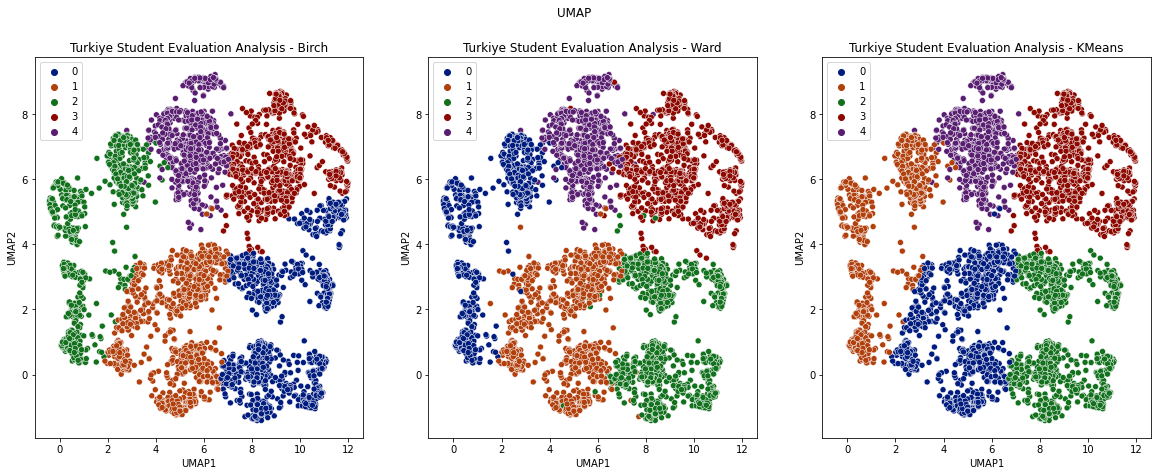

In [69]:
fig , axes = plt.subplots(1,3 , figsize =(20,7))
fig.suptitle('UMAP')

sns.scatterplot(x="UMAP1", y="UMAP2", hue=df_umap['Birch'].tolist(),
                palette=('dark'),
                data=df_umap , ax =axes[0]).set(title="Turkiye Student Evaluation Analysis - Birch") ;

sns.scatterplot(x="UMAP1", y="UMAP2", hue=df_umap['ward'].tolist(),
                palette=('dark'),
                data=df_umap , ax = axes[1]).set(title="Turkiye Student Evaluation Analysis - Ward") ;

sns.scatterplot(x="UMAP1", y="UMAP2", hue=df_umap['Kmeans'].tolist(),
                palette=('dark'),
                data=df_umap , ax =axes[2]).set(title="Turkiye Student Evaluation Analysis - KMeans") ;

In [70]:
print("Ward vs Birch : {0:01f}".format(adjusted_rand_score(df_umap['ward'], df_umap['Birch'])))
print("Ward vs Kmeans : {0:03f}".format(adjusted_rand_score(df_umap['ward'], df_umap['Kmeans_umap'])))
print("Kmeans vs Birch : {0:03f}".format(adjusted_rand_score(df_umap['Kmeans_umap'], df_umap['Birch'])))

Ward vs Birch : 0.877852
Ward vs Kmeans : 0.851510
Kmeans vs Birch : 0.813223
